In [12]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
df2= pd.read_csv("../Web Scraping/predicting_house_price.csv")

In [3]:
df2

,Unnamed: 0,lat,lon,city,style,building_type,cooling_type,heating_type,price,number_of_beds,number_of_baths,extra_space,fire_place
0,0,43.333410,-79.882930,Waterdown,Townhouse,Row / Townhouse,Central air conditioning,Forced air,749900.0,2,3,0,0
1,1,43.856371,-79.337682,Markham,Detached,House,Central air conditioning,Forced air,2998000.0,5,8,1,1
2,2,43.670890,-79.316931,Toronto,Detached,House,Central air conditioning,Forced air,2599900.0,3,4,0,1
3,3,43.589623,-79.644388,Mississauga,Semi-Detached,House,Central air conditioning,Forced air,2499850.0,4,4,1,0
4,4,43.447436,-79.666672,Oakville,Detached,House,Central air conditioning,Forced air,1999000.0,5,4,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,628,43.968686,-78.651357,Clarington,Detached,House,Central air conditioning,Forced air,699900.0,3,3,0,1
605,629,43.256080,-79.872858,Hamilton,Townhouse,Row / Townhouse,Central air conditioning,Forced air,699900.0,3,2,0,0
606,630,42.303830,-82.818927,Lakeshore,Detached,House,Central air conditioning,Forced air,699900.0,3,3,1,0
607,631,42.283820,-82.997089,Windsor,Townhouse,Row / Townhouse,Central air conditioning,Forced air,699888.0,2,3,1,0


In [4]:
df2=df2.ffill()

In [5]:
df2.head()

,Unnamed: 0,lat,lon,city,style,building_type,cooling_type,heating_type,price,number_of_beds,number_of_baths,extra_space,fire_place
0,0,43.333410,-79.882930,Waterdown,Townhouse,Row / Townhouse,Central air conditioning,Forced air,749900.0,2,3,0,0
1,1,43.856371,-79.337682,Markham,Detached,House,Central air conditioning,Forced air,2998000.0,5,8,1,1
2,2,43.670890,-79.316931,Toronto,Detached,House,Central air conditioning,Forced air,2599900.0,3,4,0,1
3,3,43.589623,-79.644388,Mississauga,Semi-Detached,House,Central air conditioning,Forced air,2499850.0,4,4,1,0
4,4,43.447436,-79.666672,Oakville,Detached,House,Central air conditioning,Forced air,1999000.0,5,4,0,1


In [6]:
df=df2[['number_of_beds','number_of_beds']]

In [9]:
df

,number_of_beds,number_of_beds
0,2,2
1,5,5
2,3,3
3,4,4
4,5,5
...,...,...
604,3,3
605,3,3
606,3,3
607,2,2


In [18]:
y=df2['price']

<AxesSubplot:xlabel='extra_space', ylabel='price'>

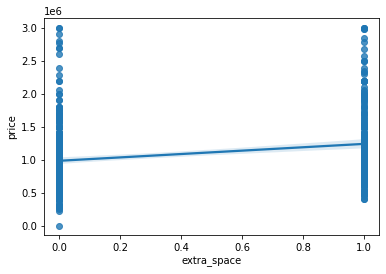

In [20]:
sns.regplot(x=df2[['extra_space']],y=y)

In [21]:
df_data_scaled = StandardScaler().fit_transform(df)

In [22]:
df_data_scaled

array([[-1.52748142, -1.52748142],
       [ 2.22851933,  2.22851933],
       [-0.27548117, -0.27548117],
       ...,
       [-0.27548117, -0.27548117],
       [-1.52748142, -1.52748142],
       [-0.27548117, -0.27548117]])

In [24]:
df.columns

Index(['number_of_beds', 'number_of_beds'], dtype='object')

In [25]:
df_data_scaled_transformed=pd.DataFrame(df_data_scaled,columns=df.columns)
df_data_scaled_transformed

,number_of_beds,number_of_beds
0,-1.527481,-1.527481
1,2.228519,2.228519
2,-0.275481,-0.275481
3,0.976519,0.976519
4,2.228519,2.228519
...,...,...
604,-0.275481,-0.275481
605,-0.275481,-0.275481
606,-0.275481,-0.275481
607,-1.527481,-1.527481


In [27]:
X=df_data_scaled_transformed
y=df2['price']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1)

In [29]:
model1 = LinearRegression()

In [30]:
model1.fit(X_train,y_train)

LinearRegression()

In [31]:
LinearRegression() 

LinearRegression()

In [32]:
y_predict=model1.predict(X_test)

In [33]:
y_predict

array([1348056.29551521, 1005081.55982772, 1005081.55982772,
       1005081.55982772, 1348056.29551521, 1005081.55982772,
       1005081.55982772, 1348056.29551521,  319132.08845274,
       1005081.55982772, 1005081.55982772,  662106.82414023,
        662106.82414023, 1348056.29551521, 1005081.55982772,
       1348056.29551521, 1005081.55982772, 1348056.29551521,
       1691031.0312027 , 1348056.29551521, 1005081.55982772,
       1348056.29551521, 1005081.55982772, 1348056.29551521,
        662106.82414023, 1005081.55982772, 1348056.29551521,
       1005081.55982772, 1005081.55982772, 1348056.29551521,
       1005081.55982772, 1348056.29551521, 1005081.55982772,
       1005081.55982772, 1005081.55982772, 1691031.0312027 ,
       1005081.55982772, 1005081.55982772, 1005081.55982772,
       1005081.55982772, 1005081.55982772,  662106.82414023,
        662106.82414023, 1348056.29551521,  662106.82414023,
       1005081.55982772, 1348056.29551521, 1005081.55982772,
       1348056.29551521,

In [34]:
score = model1.score(X_test, y_test,sample_weight=None)

In [35]:
score

0.13093018524309952

In [36]:
r2 = r2_score(y_test, y_predict)

In [37]:
r2

0.13093018524309952